# PageRank: Eigenvectores y Eigenvalores

## 1. Introducción

Las búsquedas por Internet cobran cada vez más y más relevancia, por lo que los motores de búsqueda han evolucionado enormemente para atender la siempre creciente cantidad de información disponible en la red.  Uno de los precursores de los motores de búsqueda por Internet, es el algoritmo PageRank de Google.  

En este trabajo se aborda el algoritmo de PageRank en su versión más simple, para entender los conceptos que lo conforman y cómo es que asigna la importancia a cada una de las páginas del resultado de una búsqueda en internet.  A este algoritmo se le conoce coloquialmente como *The 25 Billion Dollar Eigenvector*.  Revisemos los conceptos que lo conforman.

## 2. Teoría

### 2.1 Breve introducción a Teoría de Grafos

Un **grafo** es un par ordenado de dos conjuntos: nodos y vínculos, que se denota $G=(N,V)$. Un vínculo ${xy}$ se dice que conecta a los nodos $x$ y $y$, y es denominado $xy$. El orden de un grafo es igual a la cantidad de nodos existentes.

Un **grafo orientado** se define como aquel en el que todos los vínculos que lo componen tienen una orientación definida. Teniendo dos nodos $x$ y $y$ cualesquiera, debe verificarse que debe existir como mínimo un vínculo dirigido entre ellos. Básicamente, son grafos en los cuales se ha añadido una orientación a las aristas, representada gráficamente por una flecha.

El **grafo de la web** describe los enlaces dirigidos entre páginas de la red de Internet. Es un grafo orientado cuyos nodos corresponden a las páginas de Internet, y un vínculo orientado conecta la página $X$ con la página $Y$ si existe un hipervínculo en la página $X$ que refiere a la página $Y$.

#### 2.1.1 Representación de grafos

Existen diferentes formas de representar un grafo (simple), además de la geométrica y muchos métodos para almacenarlos en una computadora. La estructura de datos usada depende de las características del grafo y el algoritmo usado para manipularlo. Entre las estructuras más sencillas y usadas se encuentran las listas y las matrices, aunque frecuentemente se usa una combinación de ambas. Las listas son preferidas en grafos dispersos porque tienen un eficiente uso de la memoria. Por otro lado, las matrices proveen acceso rápido, pero pueden consumir grandes cantidades de memoria. Por el objetivo de este trabajo se hablará sobre la estructura matricial.

**Estructura matricial**
* Matriz de adyacencia: El grafo está representado por una matriz cuadrada M de tamaño $n^{2}$, donde $n$ es el número de nodos. Si hay un vínculo entre un nodo $x$ y un nodo $y$, entonces el elemento $m_{x,y}$ es $1$, de lo contrario, es $0$.
* Matriz de incidencia: El grafo está representado por una matriz de $V$ (vínculos) por $N$ (nodos), donde [nodo, vínculos] contiene la información del vínculo ($1$ si es conectado, $0$ si es no conectado).

### 2.2 ¿Qué es el PageRank?

El algoritmo PageRank es utilizado por Google Search para ayudarle a determinar la importancia o relevancia de una página web basándose en el grafo de la web. Fue desarrollado por los fundadores de Google, Larry Page y Sergey Brin, en la Universidad de Stanford mientras estudiaban el posgrado en ciencias de la computación.

El algoritmo PageRank se basa en la idea de que se puede juzgar la importancia de una página web mirando las páginas que contienen un vínculo hacia la misma. Para esto, se definen $O_i$ al conjunto de páginas que son referenciadas por $i$ (llamadas `outlinks`) e $I_i$ como el conjunto de páginas que hacen referencia a la página $i$ (llamadas `inlinks`). Si una página $A$ contiene un *outlink* a otra página $B$ se interpreta que la página $A$ considera que el contenido de $B$ es relevante para la temática abordada en $A$. Si existen muchos *inlinks* hacia $B$ se considera que es de común acuerdo que la página $B$ es importante. Por otro lado, si la página $B$ tiene solamente un *inlink* pero éste proviene de una página $C$ con autoridad (importancia) decimos que $C$ transfiere su autoridad a $B$, es decir, indica que $B$ es importante. Utilizando estos conceptos de importancia y autoridad el algoritmo PageRank asigna un rango a cada página basándose en sus *inlinks*. 

No es el único algoritmo utilizado para el motor de búsqueda de Google, pero fue el primero y el más conocido.

### 2.3 Algoritmo

El algoritmo inicial del PageRank lo podemos encontrar en el documento original donde sus creadores presentaron el prototipo de Google: “The Anatomy of a Large-Scale Hypertextual Web Search Engine":

$$
PR(A) = (1-d) + d\sum_{i=1}^n \frac{PR(i)}{C(i)}
$$

Donde:
- $PR(A)$ es el PageRank de la página A.
- $d$ es un factor de amortiguación que tiene un valor entre 0 y 1.
- $PR(i)$ son los valores de PageRank que tienen cada una de las páginas $i$ que enlazan a $A$.
- $C(i)$ es el número total de enlaces salientes de la página $i$ (sean o no hacia $A$).

#### 2.3.1 Factor de amortiguación

La teoría del PageRank sostiene que un usuario cualquiera que aleatoriamente hace click en distintos links eventualmente dejará de hacerlo. La probabilidad, en cualquier paso, de que la persona continúe es un factor de amortiguación $d$. Este modelo se puede entender como una cadena de Markov, que es un proceso estocástico donde el valor presente de una variable aleatoria es relevante para predecir el valor futuro de dicha variable. Esto nos indica que la probabilidad de realización de determinado suceso sólo depende de lo ocurrido en el periodo inmediatamente anterior. 

Varios estudios han probado diferentes factores de amortiguación, pero generalmente se asume que el factor de amortiguación se establecerá alrededor de $0.85$. 

La introducción del factor de amortiguación en la fórmula resta algo de peso a todas las páginas de Internet y consigue que las páginas que no tienen *outlinks* no salgan especialmente beneficiadas. Si un usuario aterriza en una página sin *outlinks*, lo que hará será navegar a cualquier otra página aleatoriamente, lo que equivale a suponer que una página sin *outlinks* tiene enlaces a todas las páginas de Internet.

### 2.4 Fórmula iterativa

$$
PR_{t+1}(P_i) = \sum_{P_j}\frac{PR_t(P_j)}{C(P_j)}
$$

Donde:
* $PR_{t+1}(P_i)$: PageRank de la página $i$ en la siguiente iteración.
* $PR_{t}(P_j)$: PageRank de la página $j$ en la iteración previa.
* $C(P_j)$: número total de *outlinks* de la página $j$.

En la iteración $0$, se inicializa un vector de tamaño $n$, y sus valores inciales para cada posición serán $\frac{1}{n}$.

### 2.5 Representación en matriz

Se pueden utilizar operaciones matriciales en vez de realizar la forma iterativa explicada previamente (donde se hacen cálculos y actualizaciones de valores de uno por uno). Con las operaciones matriciales se pueden realizar múltiples cálculos al mismo tiempo.

Se define la matriz $H$ que será la matriz de adyacencia asociada al grafo. Esta matriz se definirá por los *outlinks* y el número de éstos por cada página. La matriz $H$ será **estocástica** que nos ayudará a describir las transiciones en una cadena de Markov.

El método utilizado para realizar estos cálculos de forma más sencilla es el **método de la potencia**.

#### 2.5.1 Método de la potencia

$$ PR_{t+1} = H PR_t$$

Donde:
* $H$ es la matriz estocástica.

Esta matriz se debe multiplicar con un vector en cada iteración, ¿pero cuál es el vector inicial? Como se ha mencionado previamente, el vector inicial será un vector de tamaño $n$, y sus valores inciales para cada posición serán $\frac{1}{n}$.

Entonces, el vector de la siguiente iteración esta dado por:
    $$v_2 = H v$$

Y la siguiente iteración será:

$$v_3 = H v_2 = H (H v) = H^2 v$$

Entonces:
    
$$v_n = H^{(n-1)} v$$

Si hacemos varias iteraciones, se converge a un valor de equilibrio, el cual será el eigenvector asociado al eigenvalor con módulo máximo.  

Esta es la principal diferencia del método de la potencia respecto a los algoritmos QR y de rotaciones de Jacobi, que aproximan a todos los eigenvalores y eigenvectores.  Adicionalmente, al sólo requerirse una operación matriz-vector, resulta más eficiente para matrices grandes y ralas, como las resultantes de una búsqueda de internet (que en el 2006, tenían una dimensión de aproximadamente $8.1\times10^9$ x $8.1\times10^9$).

## 3. Datos

Para fines ilustrativos y mostrar con claridad el funcionamiento del algoritmo, se utilizará un set de datos sencillo en el reporte.  Si se desea ahondar con sets de datos que contengan más nodos y vínculos, se puede hacer referencia al [Ejemplo de implementación](https://github.com/lecepe00/PageRank-eigenvectores-eigenvalores/tree/main/Implementacion) incluido en el repositorio.

## 4. Implementación

### Ejemplo:

Supongamos que tenemos 4 páginas web donde:
- la página A apunta a las páginas C y B
- la página B apunta a la página D
- la página C apunta a las páginas A, B, D
- la página D apunta a la página C

Veámoslo de forma gráfica:

In [3]:
import numpy as np
import math
import pandas as pd
from scipy.sparse import csr_matrix 
  
# Para las pruebas
from pytest import approx
import pprint

# Para los grafos
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
pages_links = pd.DataFrame( columns=['pagina', 'outlinks'])
pages_links['pagina'] = ['A', 'B', 'C', 'D']
pages_links['outlinks'][0] = ['C', 'B']
pages_links['outlinks'][1] = ['D']
pages_links['outlinks'][2] = ['A', 'B', 'D']
pages_links['outlinks'][3] = ['C']

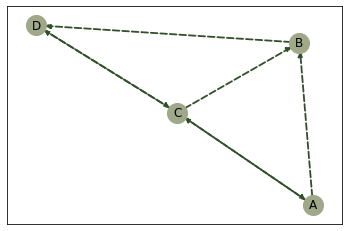

In [5]:
nodos = pages_links['pagina']

G = nx.DiGraph()

for nodo in nodos:
    G.add_node(nodo)
    
for page, outlinks in zip(pages_links['pagina'],pages_links['outlinks']):
    for outlink in outlinks:
        G.add_edge(page, outlink)

pos = nx.spring_layout(G)


nx.draw_networkx_nodes(G, pos, node_color='#a0a88a', node_size=400)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='#305029', width=1.8, arrows = True, style='dashed')

plt.show()

Definimos nuestra matriz estocástica conforme a lo previamente definido:

In [6]:
sparseMatrix = csr_matrix((len(pages_links), len(pages_links)),  
                          dtype = np.float).toarray() 
newdf = pd.DataFrame(sparseMatrix, columns = pages_links['pagina'], index=pages_links['pagina'])
count = 0
for page, outlinks in zip(pages_links['pagina'],pages_links['outlinks']):
    score = 1/len(outlinks)
    dict_page = {page: np.zeros(len(pages_links))}
    for outlink in outlinks:
        newdf[page][outlink] = score

In [7]:
H = newdf.to_numpy()
H

array([[0.        , 0.        , 0.33333333, 0.        ],
       [0.5       , 0.        , 0.33333333, 0.        ],
       [0.5       , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.33333333, 0.        ]])

Ahora definimos el vector inicial, que en este caso será:

\begin{align}
    v &= \begin{bmatrix}
           1/4 \\
           1/4 \\
           1/4 \\
           1/4
         \end{bmatrix}
  \end{align}

In [8]:
v = np.ones(len(pages_links))
v = v*1/len(v)
pprint.pprint(v)

array([0.25, 0.25, 0.25, 0.25])


Como habíamos definido antes: 

$$v_n = H^{n-1}v$$

donde $n$ será el número de iteraciones. 

En este caso probaremos con 20 iteraciones para obtener el vector 21.

In [9]:
n = 20
H = np.linalg.matrix_power(H, n)
v_n = H@v

Cuando hacemos los cálculos obtenemos $v_n$:

In [10]:
v_n

array([0.12500368, 0.18750089, 0.37499297, 0.31250246])

Para mejor entendimiento:

In [11]:
df = pd.DataFrame(v_n, columns=['pagerank'])

df['nodo'] = pages_links['pagina']
df = df.set_index('nodo')

df

,pagerank
nodo,
A,0.125004
B,0.187501
C,0.374993
D,0.312502


Volvemos a graficar con sus respectivos PageRank y podemos observar que $C$ es la página con más alto PageRank, por lo tanto será mostrado primero en el motor de búsqueda.

In [12]:
power_method = df.pagerank.to_dict()

power_method_round = {}    
for node in power_method:
    if node in power_method:
        #set the node name as the key and the label as its value 
        power_method_round[node] = round(power_method[node],2)

{'A': 'A:0.13', 'B': 'B:0.19', 'C': 'C:0.37', 'D': 'D:0.31'}


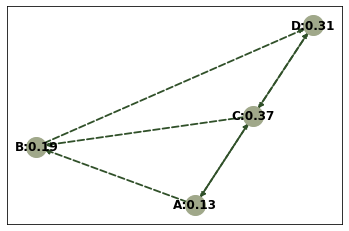

In [13]:
G = nx.DiGraph()

for nodo in power_method:
    G.add_node(nodo)

for page, outlinks in zip(pages_links['pagina'],pages_links['outlinks']):
    for outlink in outlinks:
        G.add_edge(page, outlink)

pos = nx.spring_layout(G)

labels = {}    
for node in G.nodes():
    if node in power_method:
        #definimos el nombre del nodo como la llave y la etiqueta como el valor 
        labels[node] = "{}:{}".format(node,round(power_method[node],2))

# Es lo mismo que power_method pero redondeado        
print(labels)

nx.draw_networkx_nodes(G, pos, node_color='#a0a88a', node_size=400)
nx.draw_networkx_labels(G, pos, labels=labels, font_weight="bold")
nx.draw_networkx_edges(G, pos, edge_color='#305029', width=1.8, arrows = True, style='dashed')

plt.show()

## 5. Conclusiones

El algoritmo de PageRank, aunque incorpora conceptos relativamente sencillos de grafos, álgebra lineal y probabilidad, los integra de una manera muy inteligente, que ayuda a darle orden a la enorme cantidad de información disponible en la red.  Es esta capacidad y flexibilidad de entender una base de datos descentralizada, siempre cambiante y en continuo crecimiento, lo que ha mantenido vigente a este algoritmo, a más de 20 años de su publicación original.

## 6. Referencias

- American Mathematical Society.  [How Google Finds Your Needle in the Web's Haystack](http://www.ams.org/publicoutreach/feature-column/fcarc-pagerank)
- Barriola, Juan M. y Dotta, Milena.  2015.  [¿CÓMO FUNCIONA GOOGLE? EL ALGORITMO PAGERANK, DIAGRAMAS DE GRAFOS Y CADENAS DE MARKOV](http://www.economicas.uba.ar/wp-content/uploads/2016/04/2-%C2%BFC%C3%B3mo-funciona-google_-el-algoritmo-pagerank-diagramas-de-grafos-y-cadenas-de-markov.-Juan-Manuel-Barriola-y-Milena-Dotta-2.pdf)
- Brin, Sergey & Page, Lawrence.  [The Anatomy of a Large-Scale Hypertextual Web Search Engine](https://web.archive.org/web/20170624024436/http://infolab.stanford.edu/~backrub/google.html)
- Bryan, Kurt & Leise, Tanya.  [THE LINEAR ALGEBRA BEHIND GOOGLE](https://www.rose-hulman.edu/~bryan/googleFinalVersionFixed.pdf)
- Equipo 4.  Optimización 2020-2.  [Ejemplo de implementación](https://github.com/lecepe00/PageRank-eigenvectores-eigenvalores/tree/main/Implementacion)
- GeeksforGeeks.  [PageRank](https://www.geeksforgeeks.org/page-rank-algorithm-implementation/)
- Global Software Support.  [PageRank Algorithm - Power Method](https://video.search.yahoo.com/yhs/search?fr=yhs-ddc-linuxmint&hsimp=yhs-linuxmint&hspart=ddc&p=page+rank#id=9&vid=b35a1c4b4379bde2aeb371cd71f68b6b&action=view)
- Ken State University.  [Eigenvalue Computations](http://www.math.kent.edu/~reichel/courses/intr.num.comp.2/lecture21/evmeth.pdf)
- Palacios M., Erick. (2020).  Libro de Optimización 2020.  [Aplicaciones y usos: Page Ranking en un buscador de páginas web](https://itam-ds.github.io/analisis-numerico-computo-cientifico/II.computo_matricial/2.3/Algoritmos_y_aplicaciones_de_eigenvalores_eigenvectores_de_una_matriz.html#aplicaciones-y-usos-page-ranking-en-un-buscador-de-paginas-web)
- Wikipedia.  [PageRank](https://en.wikipedia.org/wiki/PageRank)
- Wikipedia.  [Teoría de grafos](https://es.wikipedia.org/wiki/Teor%C3%ADa_de_grafos)